In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

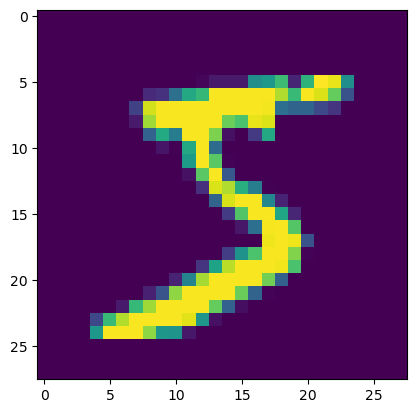

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train=X_train/255
X_test=X_test/255

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
28*28

784

In [10]:
784/2,392/2

(392.0, 196.0)

In [11]:
X_train[0].shape

(28, 28)

In [38]:
Encoder=Sequential()
Encoder.add(Flatten(input_shape=[28,28]))
Encoder.add(Dense(400,activation='relu'))
Encoder.add(Dense(200,activation='relu'))
Encoder.add(Dense(100,activation='relu'))
Encoder.add(Dense(50,activation='relu'))
Encoder.add(Dense(25,activation='relu'))

In [14]:
25/784  ##going down to 3%

0.03188775510204082

In [39]:
Decoder=Sequential()
Decoder.add(Dense(50,activation='relu',input_shape=[25]))  ##start from 50 not 25
Decoder.add(Dense(100,activation='relu'))
Decoder.add(Dense(200,activation='relu'))
Decoder.add(Dense(400,activation='relu'))
Decoder.add(Dense(784,activation='sigmoid'))
Decoder.add(Reshape([28,28]))

In [40]:
autoencoder=Sequential([Encoder,Decoder])

In [41]:
autoencoder.compile(loss='binary_crossentropy',optimizer=SGD(learning_rate=1.5),metrics=['accuracy'])

In [42]:
autoencoder.fit(X_train,X_train,validation_data=(X_test,X_test),epochs=6)

Epoch 1/6
1875/1875 [==============================] - 34s 17ms/step - loss: 0.2509 - accuracy: 0.0886 - val_loss: 0.2086 - val_accuracy: 0.1228
Epoch 2/6
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1882 - accuracy: 0.1616 - val_loss: 0.1754 - val_accuracy: 0.1735
Epoch 3/6
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1644 - accuracy: 0.1915 - val_loss: 0.1549 - val_accuracy: 0.1965
Epoch 4/6
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1514 - accuracy: 0.2087 - val_loss: 0.1483 - val_accuracy: 0.2075
Epoch 5/6
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1435 - accuracy: 0.2207 - val_loss: 0.1394 - val_accuracy: 0.2227
Epoch 6/6
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1382 - accuracy: 0.2290 - val_loss: 0.1329 - val_accuracy: 0.2308


In [43]:
df_loss=pd.DataFrame(autoencoder.history.history)

<Axes: >

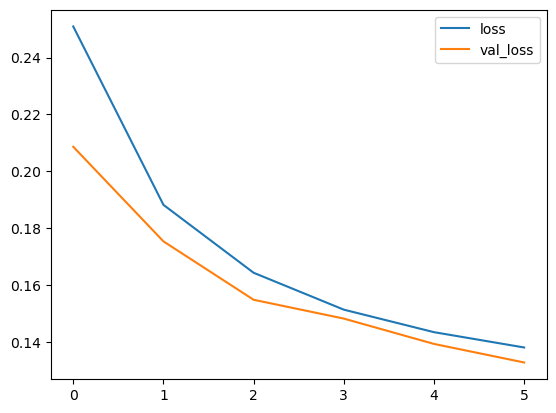

In [44]:
df_loss[['loss','val_loss']].plot()

<Axes: >

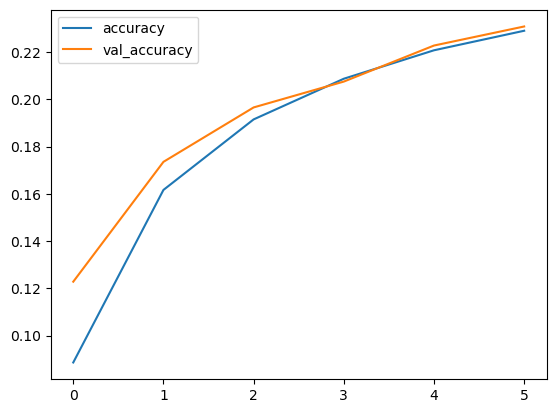

In [45]:
df_loss[['accuracy','val_accuracy']].plot()

In [52]:
passed_images=autoencoder.predict(X_test[:30])

1/1 [==============================] - 0s 76ms/step


Original image



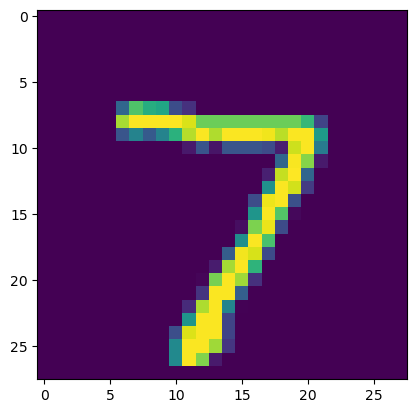

Predicted image



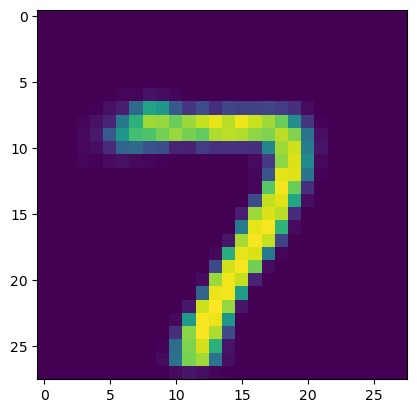

Original image



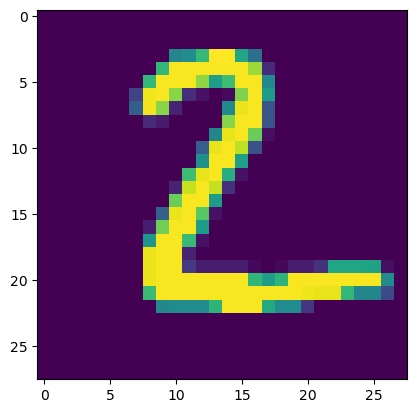

Predicted image



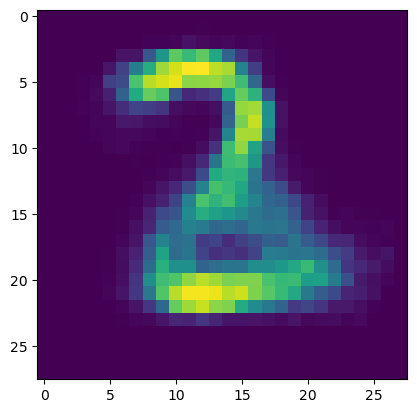

Original image



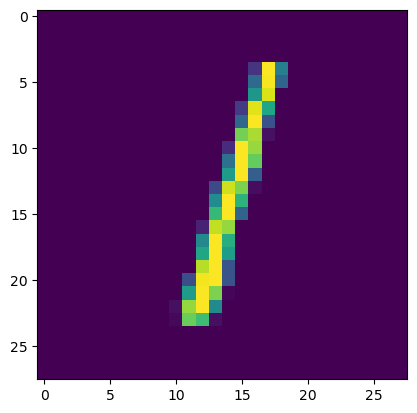

Predicted image



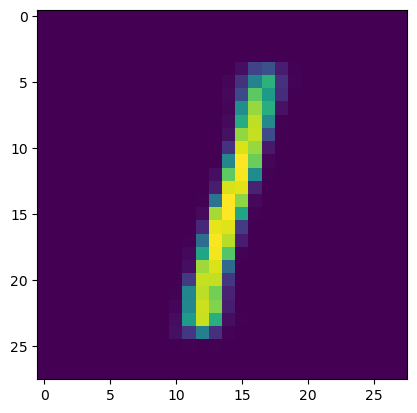

Original image



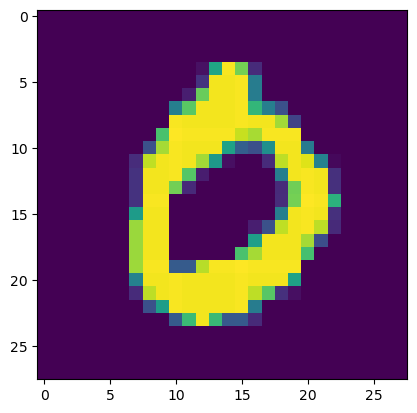

Predicted image



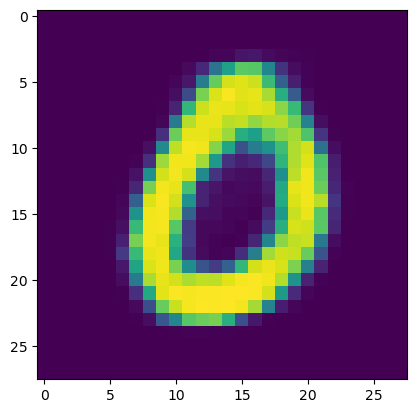

Original image



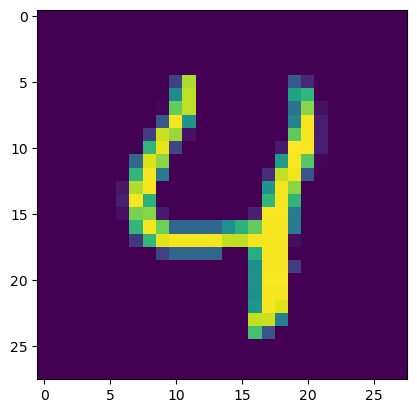

Predicted image



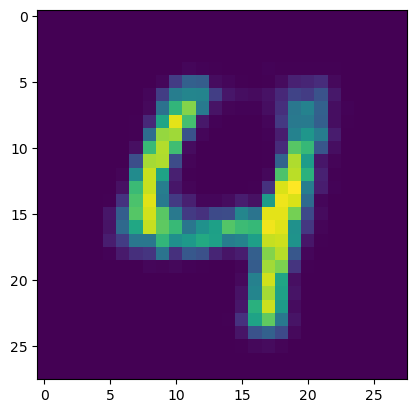

Original image



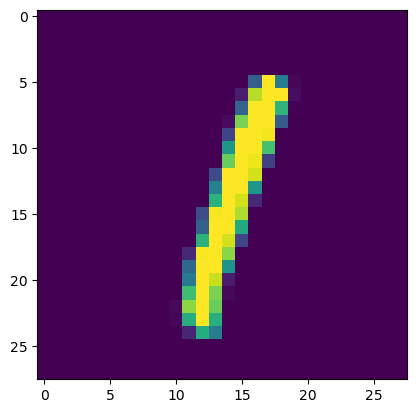

Predicted image



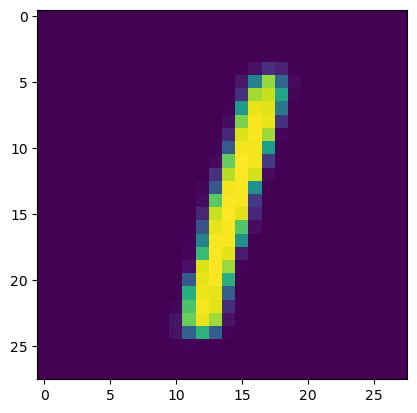

Original image



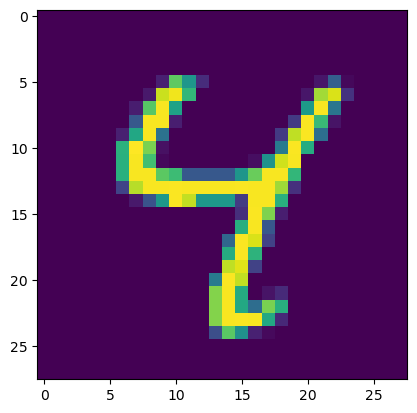

Predicted image



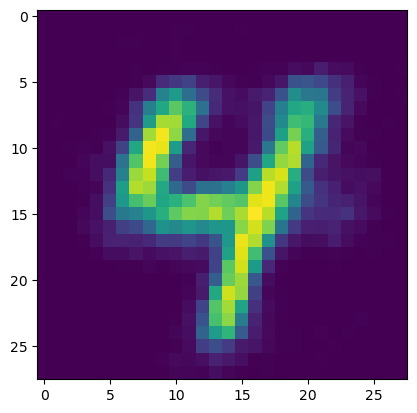

Original image



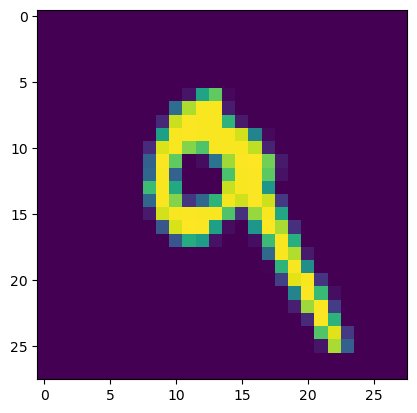

Predicted image



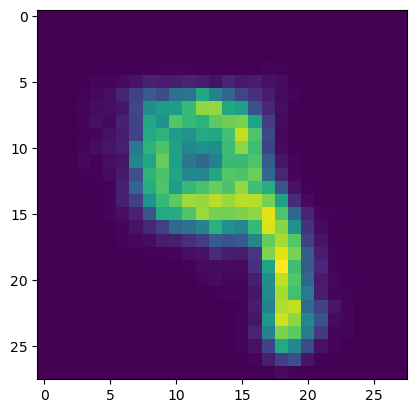

Original image



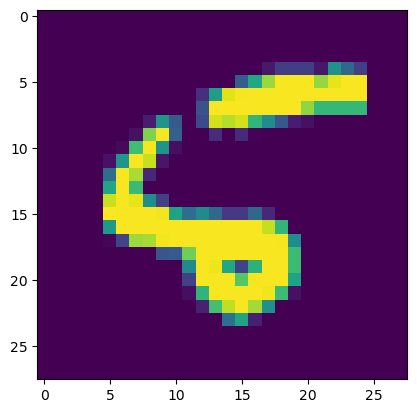

Predicted image



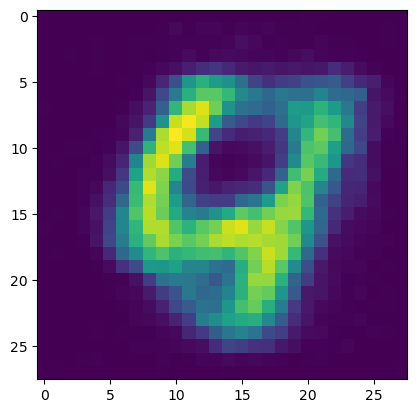

Original image



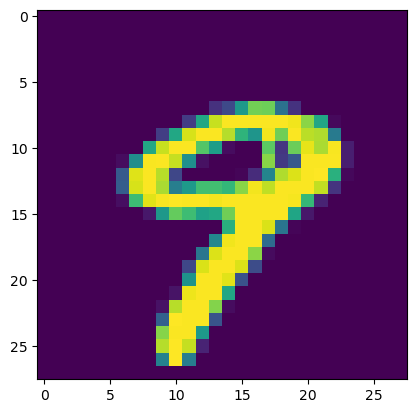

Predicted image



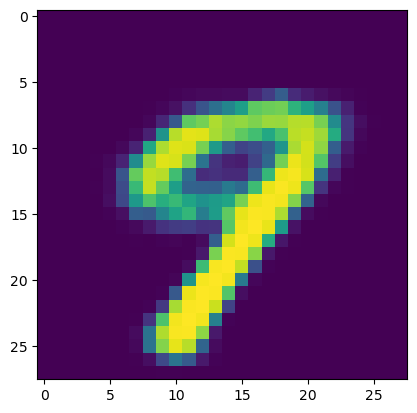

Original image



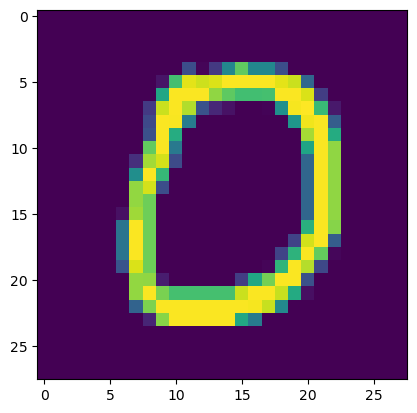

Predicted image



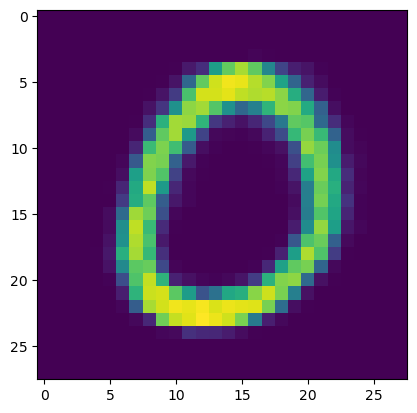

Original image



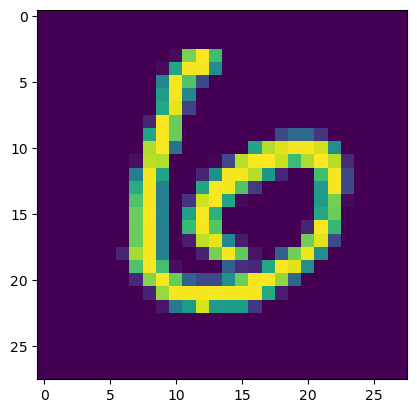

Predicted image



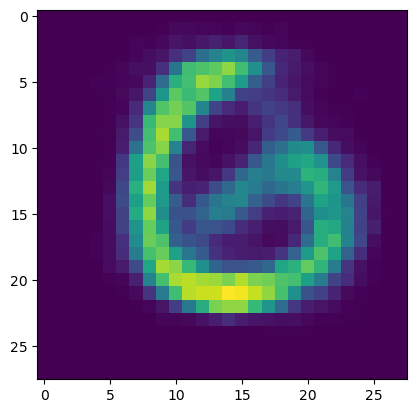

Original image



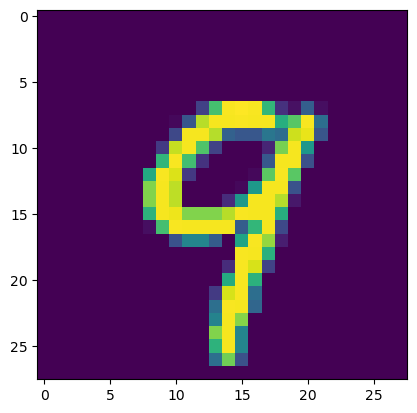

Predicted image



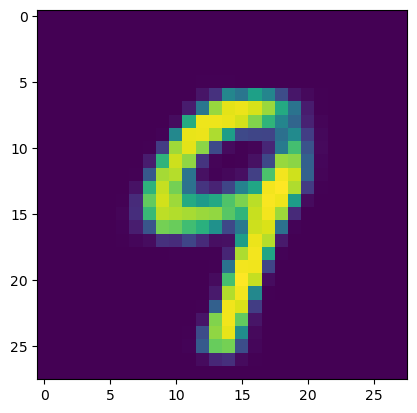

Original image



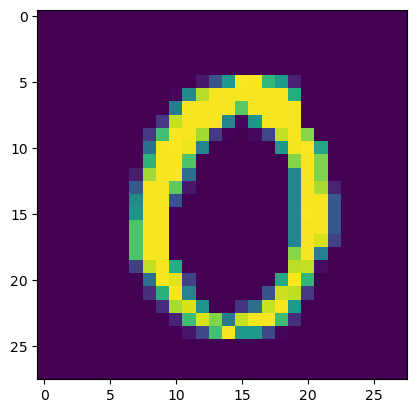

Predicted image



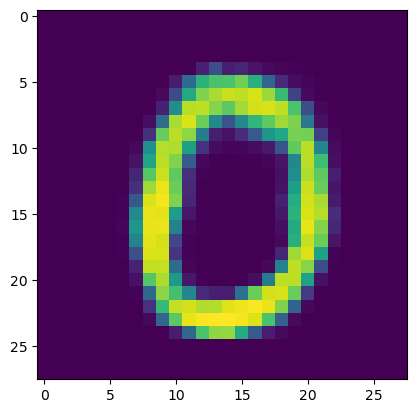

Original image



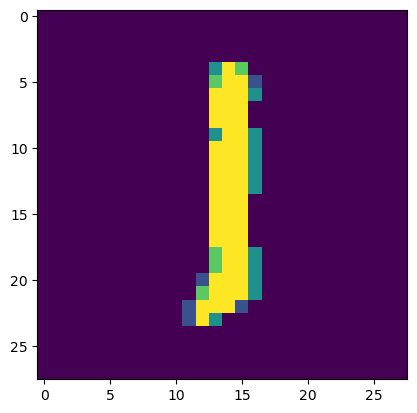

Predicted image



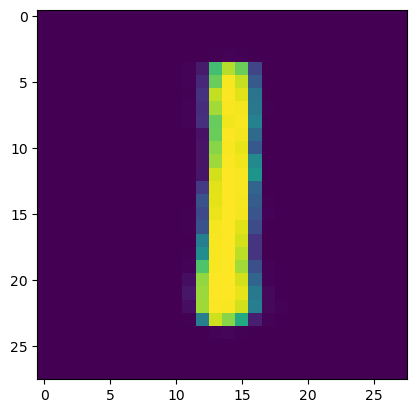

Original image



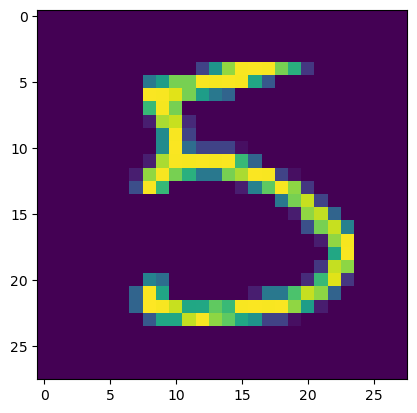

Predicted image



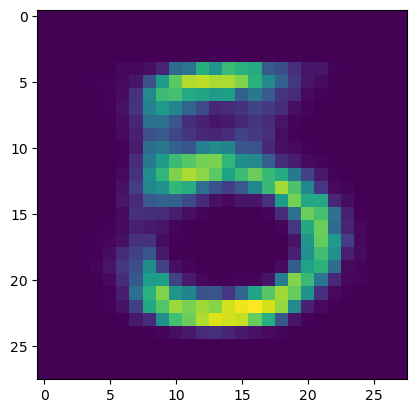

Original image



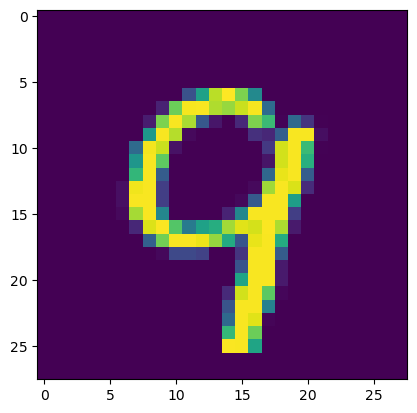

Predicted image



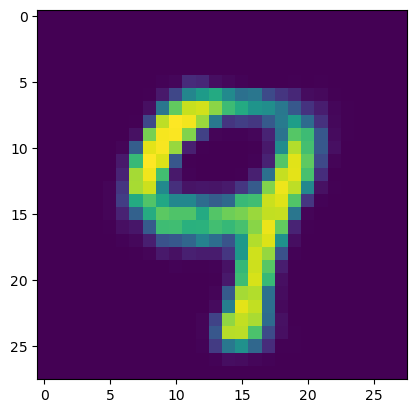

Original image



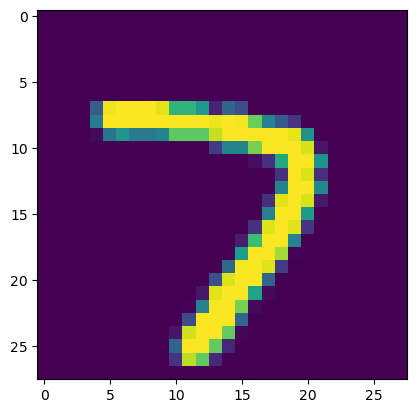

Predicted image



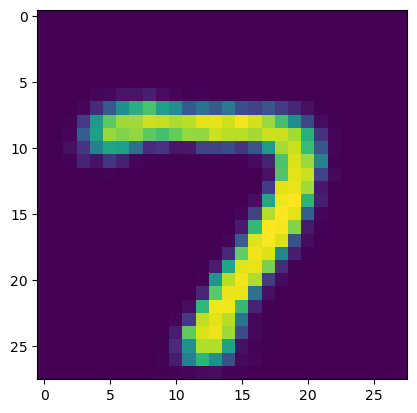

Original image



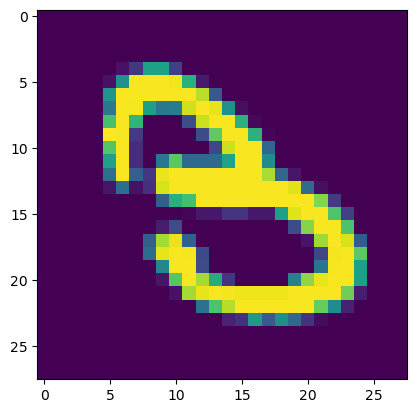

Predicted image



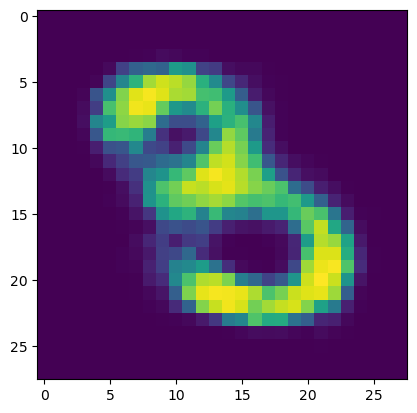

Original image



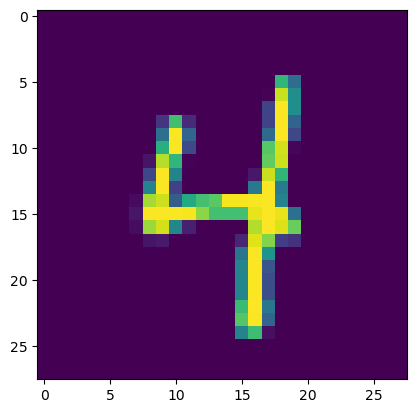

Predicted image



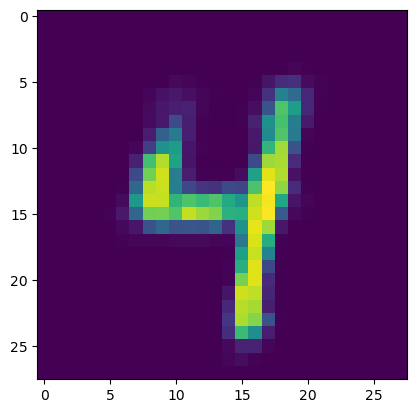

Original image



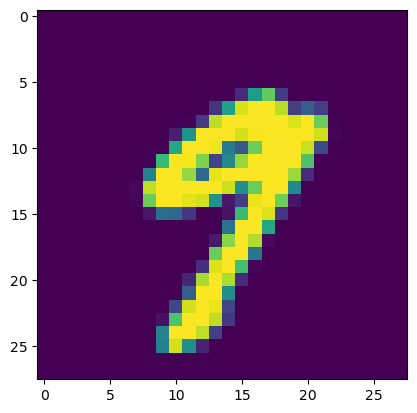

Predicted image



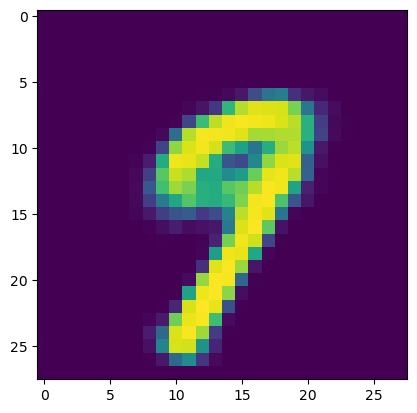

Original image



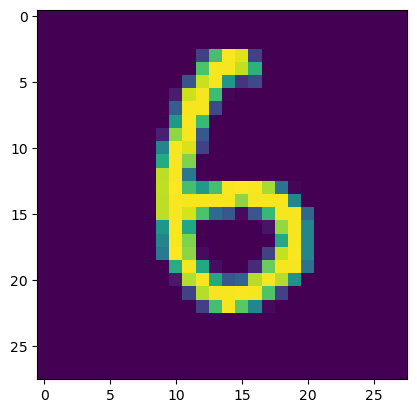

Predicted image



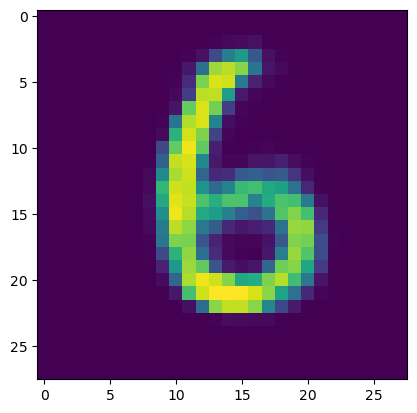

Original image



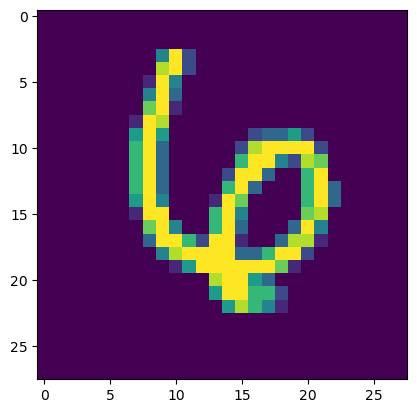

Predicted image



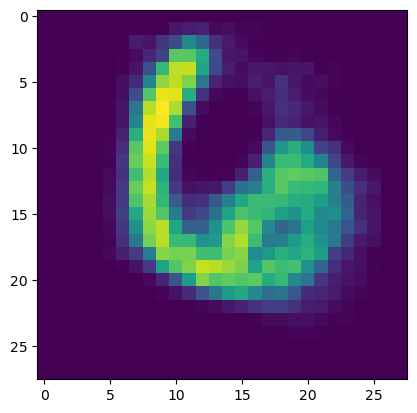

Original image



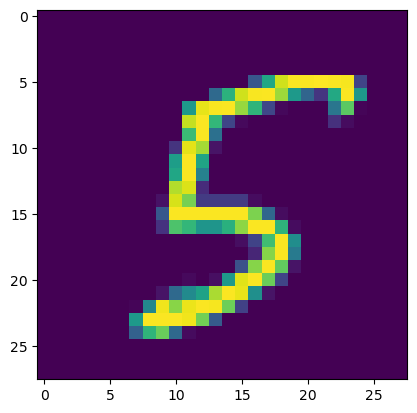

Predicted image



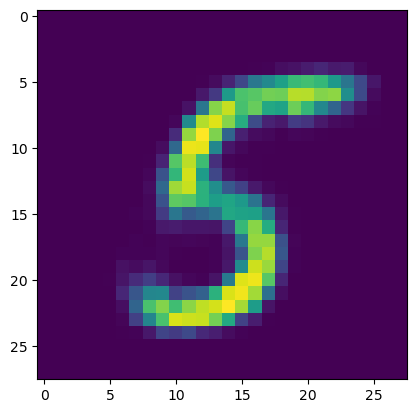

Original image



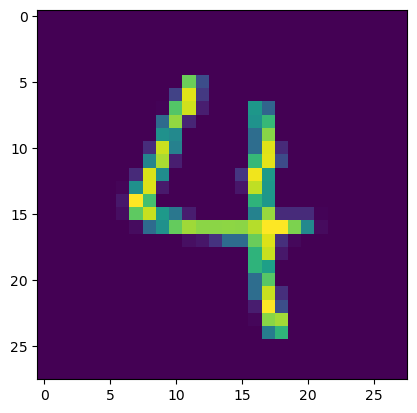

Predicted image



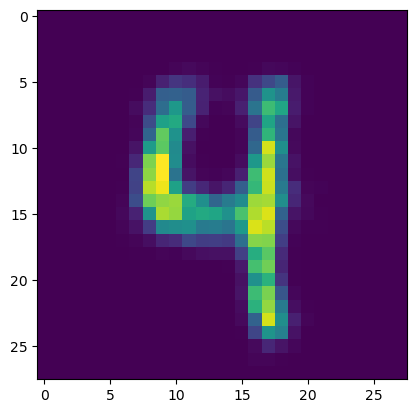

Original image



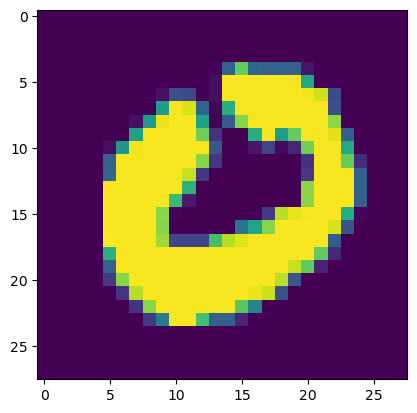

Predicted image



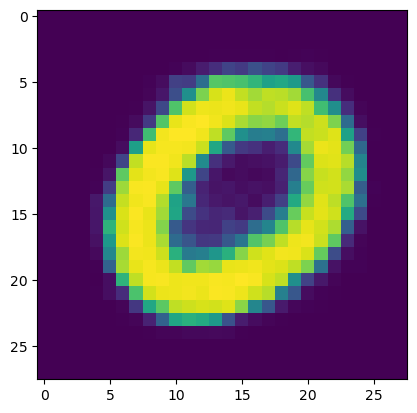

Original image



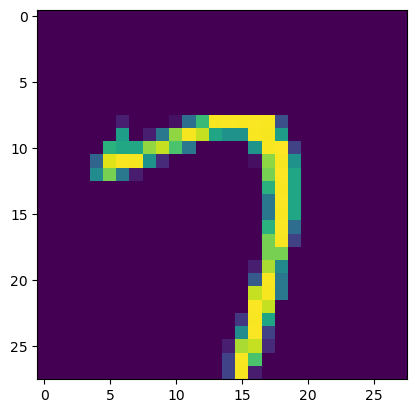

Predicted image



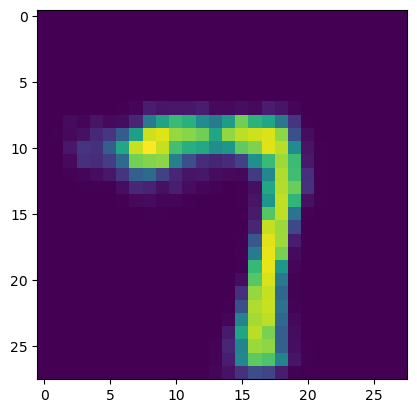

Original image



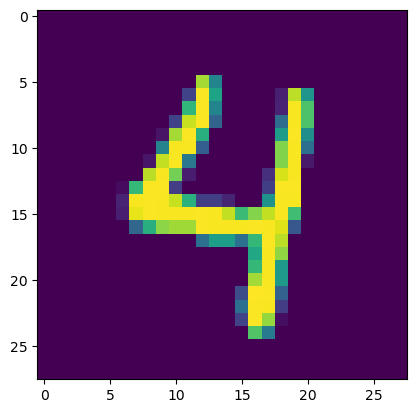

Predicted image



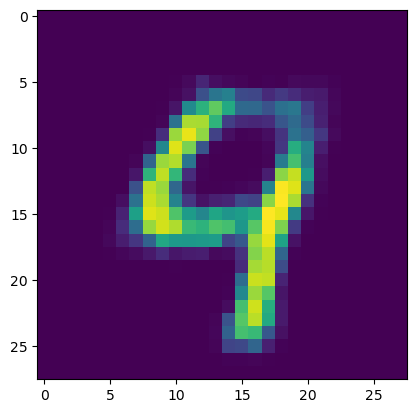

Original image



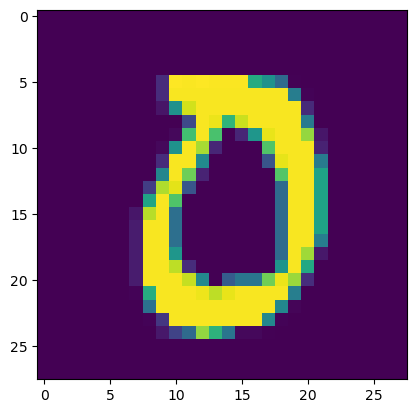

Predicted image



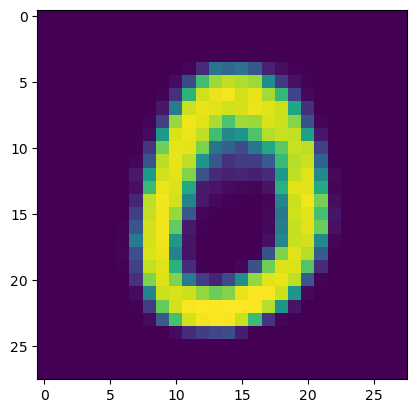

Original image



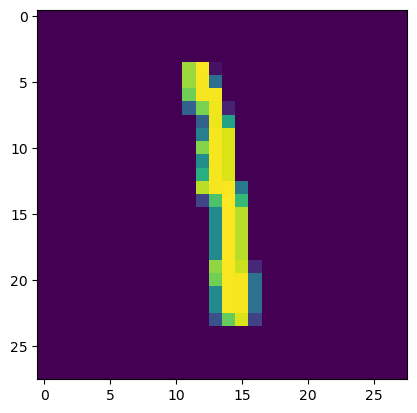

Predicted image



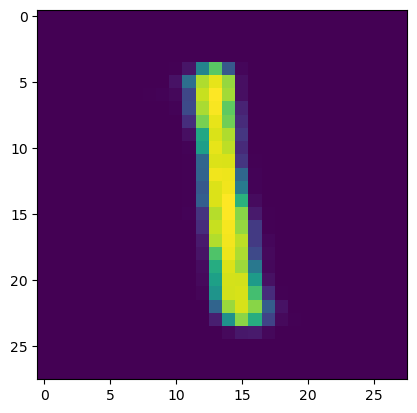

In [53]:
n=30
for i in range(n):
    print('Original image\n')
    plt.imshow(X_test[i])
    plt.show()
    print('Predicted image\n')
    plt.imshow(passed_images[i])
    plt.show()

## Enter noise to pictures

In [54]:
from tensorflow.keras.layers import GaussianNoise

In [55]:
sample=GaussianNoise(0.2)

In [56]:
noisy=sample(X_test[:20],training=True)

Original image



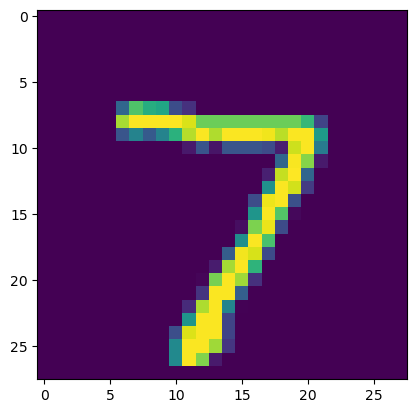

Noisy image



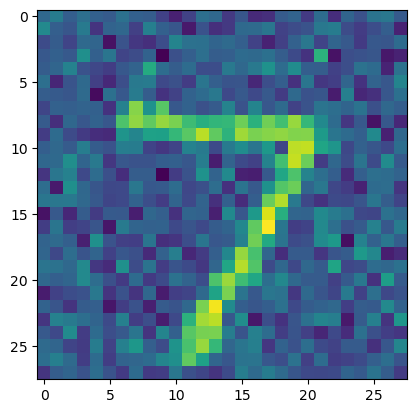

Original image



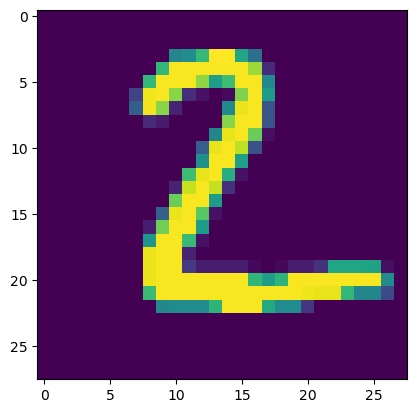

Noisy image



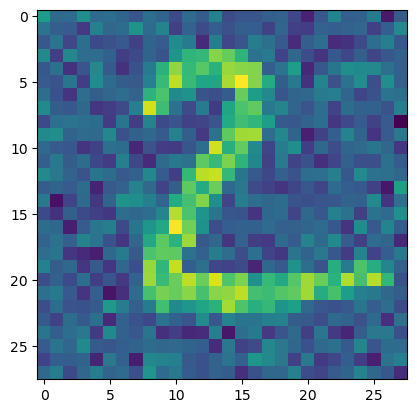

Original image



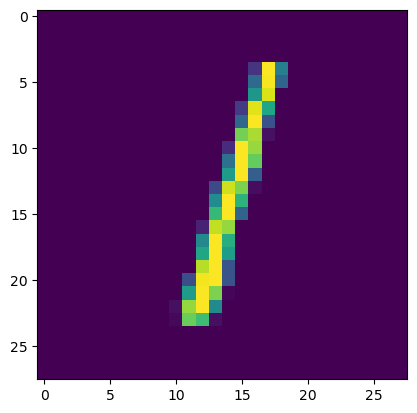

Noisy image



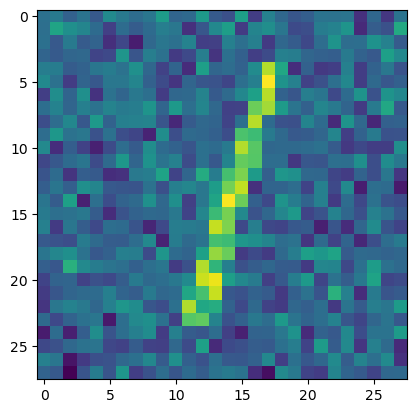

Original image



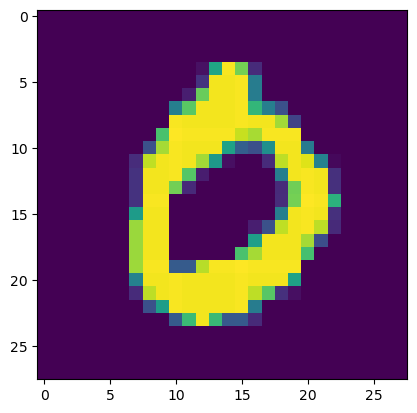

Noisy image



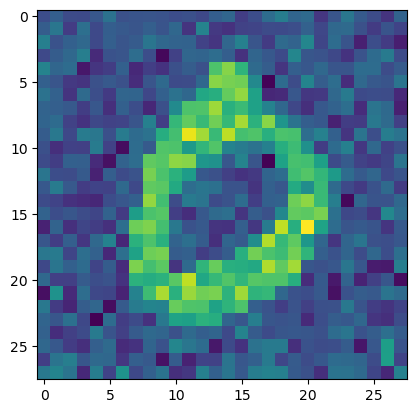

Original image



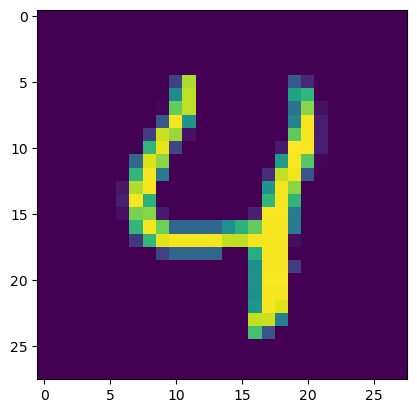

Noisy image



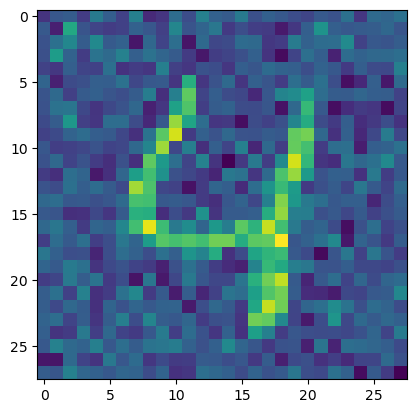

Original image



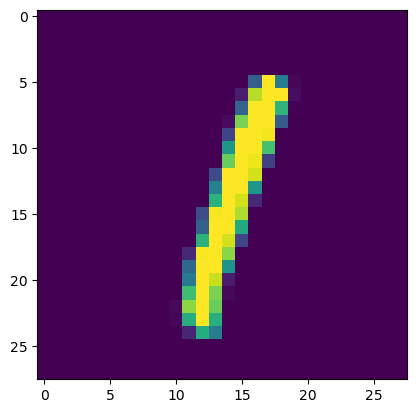

Noisy image



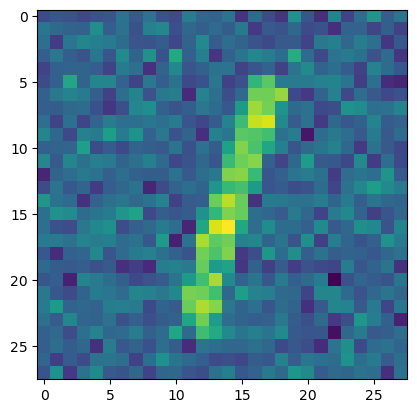

Original image



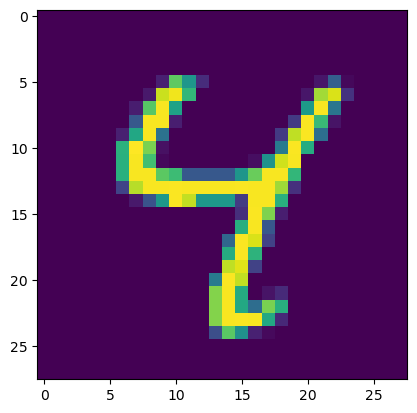

Noisy image



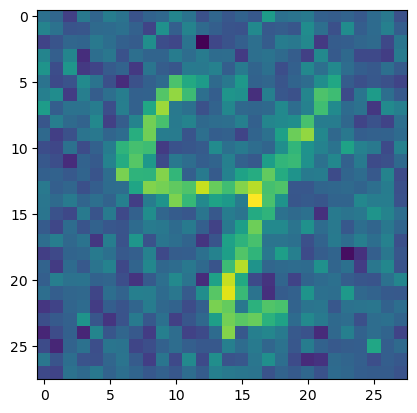

Original image



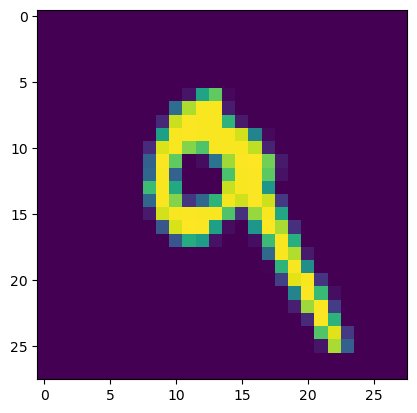

Noisy image



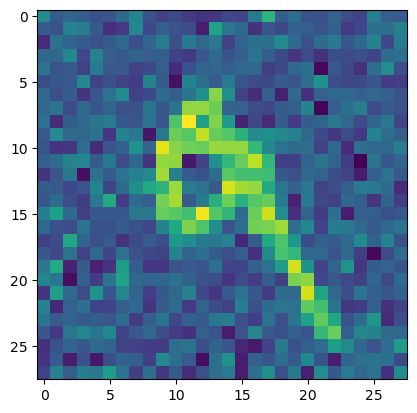

Original image



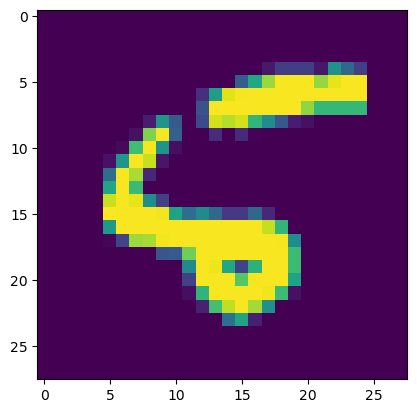

Noisy image



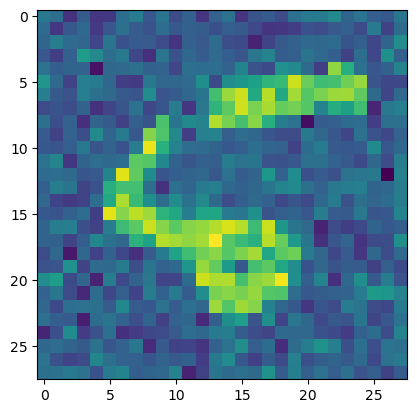

Original image



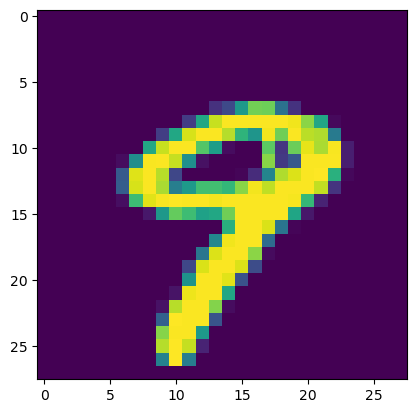

Noisy image



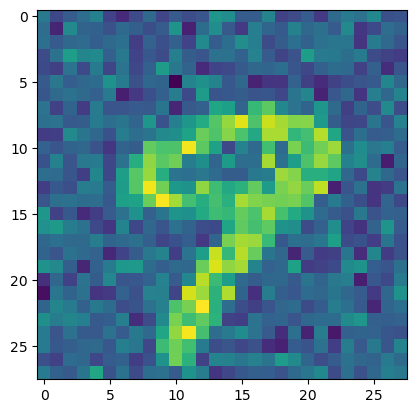

Original image



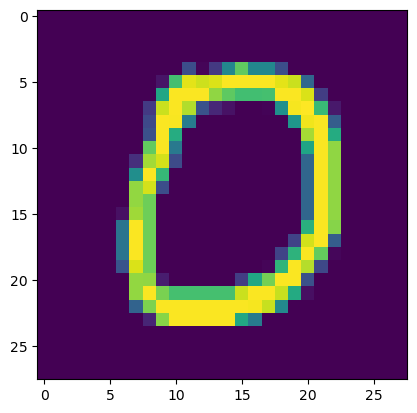

Noisy image



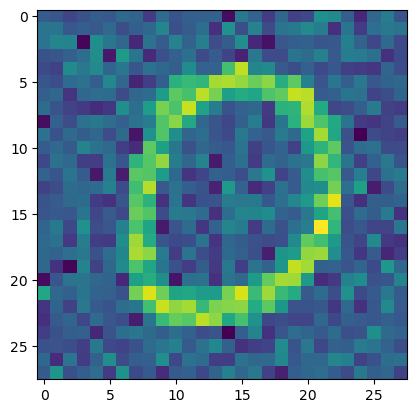

Original image



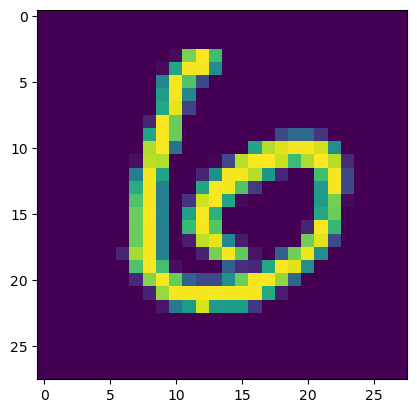

Noisy image



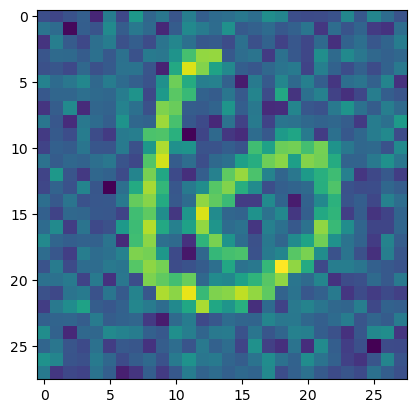

Original image



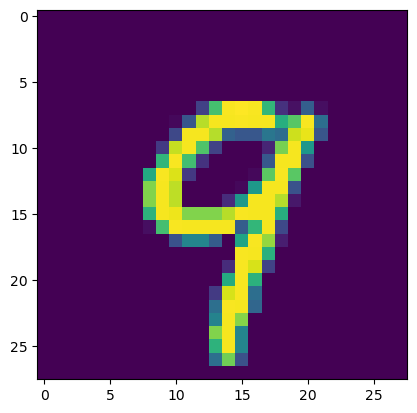

Noisy image



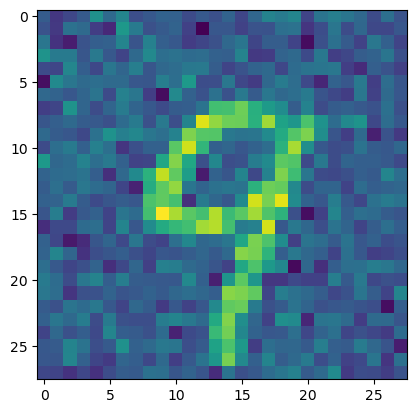

Original image



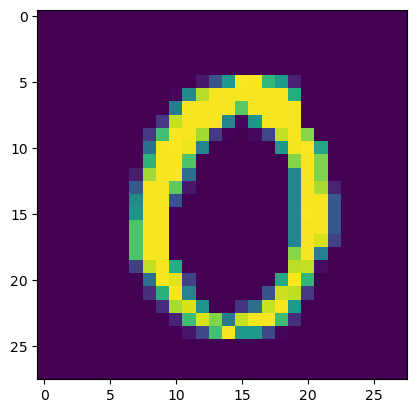

Noisy image



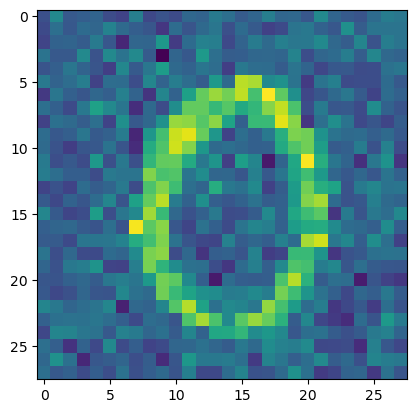

Original image



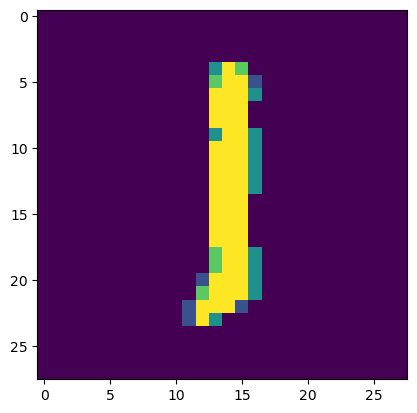

Noisy image



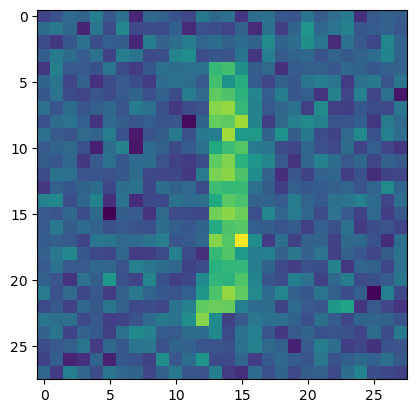

Original image



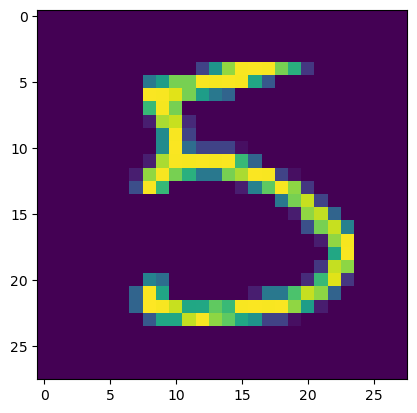

Noisy image



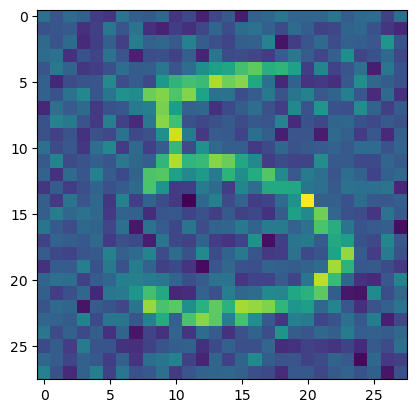

Original image



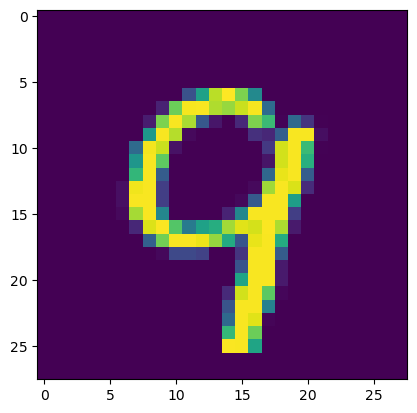

Noisy image



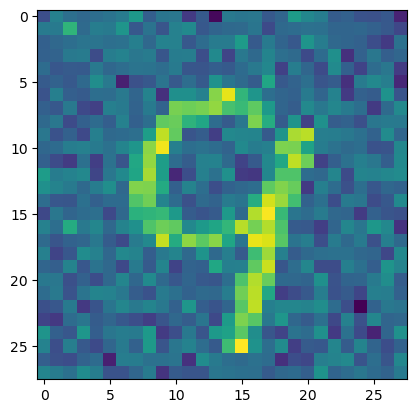

Original image



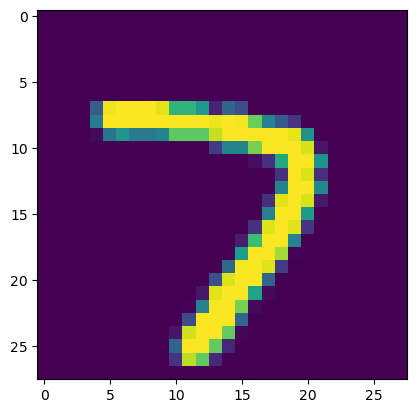

Noisy image



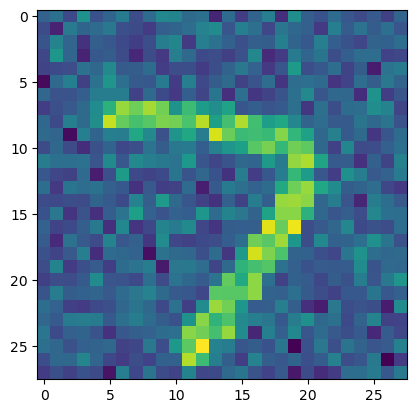

Original image



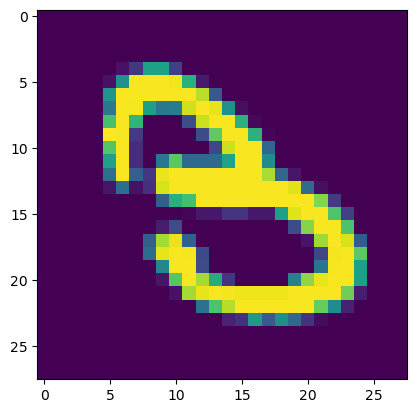

Noisy image



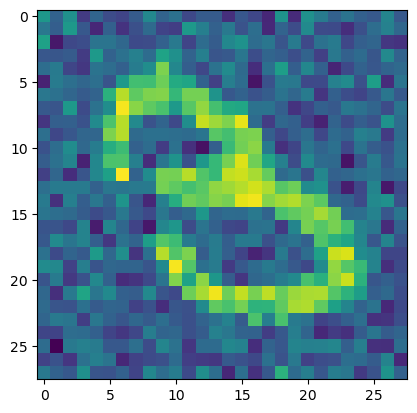

Original image



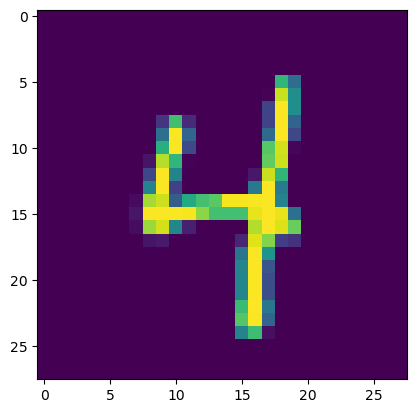

Noisy image



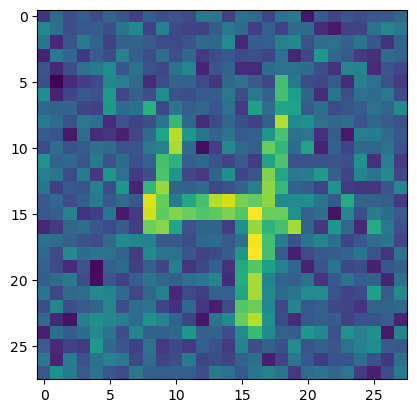

In [57]:
n=20
for i in range(n):
    print('Original image\n')
    plt.imshow(X_test[i])
    plt.show()
    print('Noisy image\n')
    plt.imshow(noisy[i])
    plt.show()